# Homework 4: Gaussian Process

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

### Question 1: Write down the Gaussian Kernal

In [116]:
# Define the Gaussian Kernal
def Kernel(x, y, variance, length_scale):
    Kernel=[]
    for i in range (0,np.size(x)):
        Kernel.append([])
        for j in range (0,np.size(y)):
            Kernel[i].append([])
            Kernel[i][j] =  np.square(variance)*np.exp(-1/(2*np.square(length_scale))*np.square(x[i]-y[j]))  # Write the Kernal Function Here
    return Kernel

*This is an intentional gap!*

In [138]:
# Define the parameters
num_functions_to_sample  = 5
num_samples_per_function = 50
noisy_std                = 0.05 # To match the note this is "sigma_n"
variance                 = 0.05 # To match the note this is "sigma_f"
length_scale             = 0.5  # To match the note this is "l"

In [139]:
# Random Data (Training Data)
# To match the note this is the "X" and "y" 
x = np.linspace(0, 2, 50)
y = np.linspace(0, 2, 50) + np.random.random([50,])

In [140]:
# sample locations
# To match the note this is "X*"
sample_points = np.linspace(0, 2, num_samples_per_function)

In [149]:
A=[1, 2, 3, 4]
B=[1, 1, 1, 1]
A*B


TypeError: can't multiply sequence by non-int of type 'list'

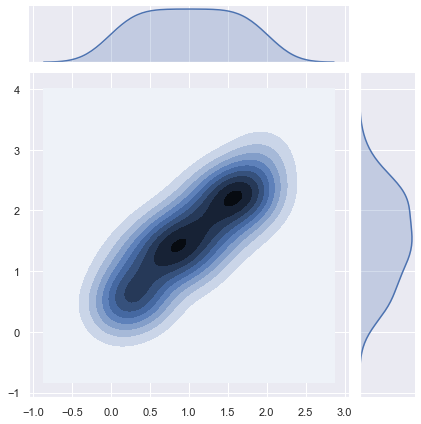

In [141]:
# Check the Joint Distribution
sns.jointplot(x=x, y=y,kind="kde");

### Question 2: Write the Equation for mean_condition 
Hint: Check the Equation on Lecture 8, Page 6 (Equation $\bar{f_*}$)

In [142]:
# compute the mean conditioned on the data points
Kxpx = Kernel(x,sample_points,variance,length_scale)
Kxx=Kernel(x,x,variance,length_scale)
Kxpxp=Kernel(sample_points,sample_points,variance,length_scale)
I=np.identity(np.size(Kxx,1))

mean_cond = np.matmul(np.matmul(Kxpx,np.linalg.inv(Kxx+np.square(noisy_std)*I)),y)   # Write the Equation  
print(mean_cond)


[0.40724372 0.44732587 0.48920825 0.53271829 0.57765642 0.62379899
 0.67090227 0.7187076  0.76694769 0.81535388 0.86366432 0.91163272
 0.95903738 1.00569026 1.05144531 1.09620598 1.13993111 1.18263884
 1.22440811 1.2653773  1.30573985 1.34573666 1.38564535 1.42576652
 1.46640746 1.50786381 1.55039981 1.59422816 1.63949013 1.68623719
 1.73441489 1.78385007 1.83424222 1.88515958 1.93604065 1.9862012
 2.03484696 2.08109166 2.12398002 2.1625148  2.19568716 2.22250899
 2.24204601 2.2534504  2.25599137 2.24908262 2.23230537 2.205426
 2.16840756 2.1214146 ]


*This is an intentional gap!*

### Question 3: Write the Equation for covariance
Hint: Check the Equation on Lecture 8, Page 6 (Equation $cov(\bar{f_*})$)

In [143]:
# compute the covariance conditioned on the data points
#cov_cond = [Kxpxp-np.matmul(Kxpx,np.linalg.inv(Kxx+np.square(noisy_std)*I),Kxpx)]  # Write the Equation  
cov_cond = Kxpxp-np.matmul(np.matmul(Kxpx,np.linalg.inv(Kxx+np.square(noisy_std)*I)),Kxpx)  # Write the Equation  
print(cov_cond)

[[ 3.96738325e-04  3.61200582e-04  3.23514497e-04 ... -2.15555565e-06
  -1.58672781e-06 -9.37809684e-07]
 [ 3.61200582e-04  3.34708487e-04  3.05642998e-04 ... -2.35979284e-06
  -2.02731103e-06 -1.58672781e-06]
 [ 3.23514497e-04  3.05642998e-04  2.84948101e-04 ... -2.43365487e-06
  -2.35979284e-06 -2.15555565e-06]
 ...
 [-2.15555565e-06 -2.35979284e-06 -2.43365487e-06 ...  2.84948101e-04
   3.05642998e-04  3.23514497e-04]
 [-1.58672781e-06 -2.02731103e-06 -2.35979284e-06 ...  3.05642998e-04
   3.34708487e-04  3.61200582e-04]
 [-9.37809684e-07 -1.58672781e-06 -2.15555565e-06 ...  3.23514497e-04
   3.61200582e-04  3.96738325e-04]]


*This is an intentional gap!*

In [129]:
# draw sample functions and plot them
f = np.random.multivariate_normal(mean_cond, cov_cond, num_functions_to_sample)

Text(0.5, 1.0, 'Gaussian Process')

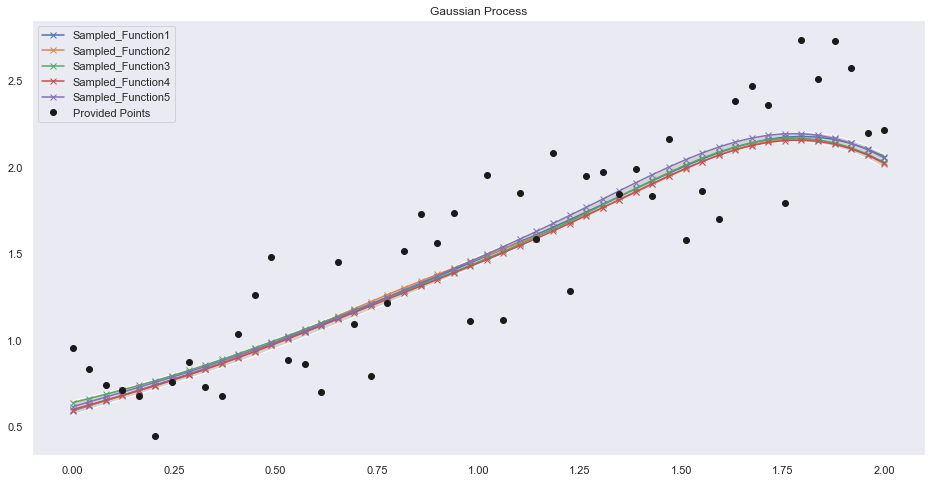

In [130]:
# Check the sampled Equation
plt.figure(figsize=(16,8))
for i in range(num_functions_to_sample):
    plt.plot(sample_points, f[i,:],'x-', label = 'Sampled_Function' + str(i+1))

# plot data points
plt.plot(x, y, 'ko',label = 'Provided Points' )
plt.legend()

# plot uncertainty region
std = np.sqrt(cov_cond.diagonal())
plt.fill_between(sample_points, mean_cond - 2 * std, mean_cond + 2 * std,
               facecolor='lightgray')
plt.grid()
plt.title('Gaussian Process')